In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_covtype, fetch_kddcup99, fetch_lfw_pairs, fetch_lfw_people, fetch_olivetti_faces
from sklearn.datasets import fetch_rcv1, load_breast_cancer, load_digits, load_wine

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [3]:
from keras import models
from keras import layers
from keras.utils import to_categorical

Breast Cancer Dataset

In [4]:
cancer = load_breast_cancer()
x_load_breast_cancer = cancer.data
y_load_breast_cancer = cancer.target

In [5]:
x_cancer = pd.DataFrame(x_load_breast_cancer)
y_cancer = pd.DataFrame(y_load_breast_cancer)
print(x_cancer.shape)
print(y_cancer.shape)

(569, 30)
(569, 1)


In [6]:
sc = StandardScaler()
x_cancer = pd.DataFrame(sc.fit_transform(x_cancer))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_cancer, y_cancer, test_size = 0.2, shuffle = True)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5, shuffle = True)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(455, 30)
(57, 30)
(57, 30)
(455, 1)
(57, 1)
(57, 1)


In [8]:
nn_cancer = models.Sequential()

nn_cancer.add(layers.Dense(128, activation = 'relu', input_shape = (30, )))
nn_cancer.add(layers.Dense(64, activation = 'relu'))
nn_cancer.add(layers.Dense(1, activation = 'sigmoid'))

nn_cancer.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
cancer_history = nn_cancer.fit(x_train, y_train, epochs = 30, validation_data = (x_dev, y_dev))

cancer_dev_acc = nn_cancer.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', cancer_dev_acc)

Epoch 1/30
15/15 [==============================] - 0s 16ms/step - loss: 0.7225 - accuracy: 0.3846 - val_loss: 0.6254 - val_accuracy: 0.4737
Epoch 2/30
15/15 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.6945 - val_loss: 0.4991 - val_accuracy: 0.8947
Epoch 3/30
15/15 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.8989 - val_loss: 0.4103 - val_accuracy: 0.9649
Epoch 4/30
15/15 [==============================] - 0s 3ms/step - loss: 0.4035 - accuracy: 0.9385 - val_loss: 0.3419 - val_accuracy: 0.9649
Epoch 5/30
15/15 [==============================] - 0s 3ms/step - loss: 0.3497 - accuracy: 0.9385 - val_loss: 0.2912 - val_accuracy: 0.9649
Epoch 6/30
15/15 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.9473 - val_loss: 0.2532 - val_accuracy: 0.9649
Epoch 7/30
15/15 [==============================] - 0s 3ms/step - loss: 0.2779 - accuracy: 0.9451 - val_loss: 0.2235 - val_accuracy: 0.9649
Epoch 8/30
15/15 [=

Plotting Accuracy & Validation Accuracy with Epoch

Plotting Loss & Validation Loss with Epoch

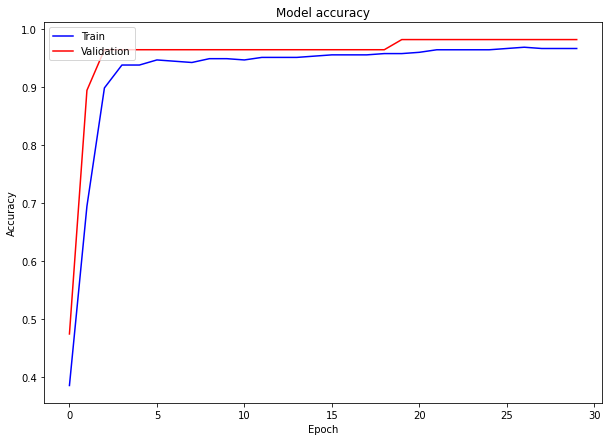

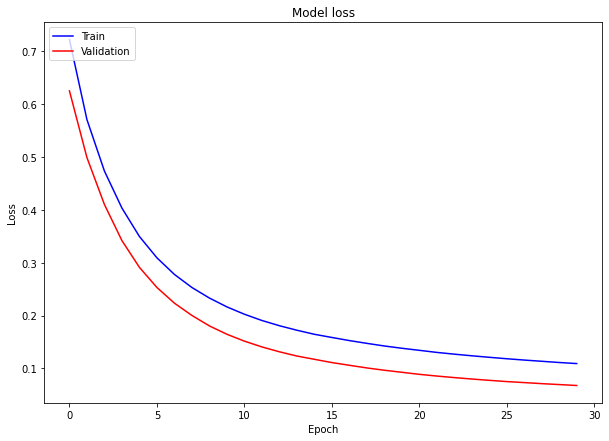

In [10]:
plt.figure(figsize = (10,7))
plt.plot(cancer_history.history['accuracy'], color = 'blue')
plt.plot(cancer_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(cancer_history.history['loss'], color = 'blue')
plt.plot(cancer_history.history['val_loss'], color = 'red')
# plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
cancer_test_acc = nn_cancer.evaluate(x_test, y_test)[1]
print('The test accuracy is', cancer_test_acc)

2/2 [==============================] - 0s 4ms/step - loss: 0.0909 - accuracy: 0.9825
The test accuracy is 0.9824561476707458
